In [1]:
from rnn_model import RNNPredictor
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
%matplotlib inline

/Users/nadya-bu/au/7term/tensorflow/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
dir_name = 'vocalizationcorpus'
data_dir = os.path.join(dir_name, 'data')
noise_data_dir = os.path.join(dir_name, 'noise_data')
labels_path = os.path.join(dir_name, 'labels.txt')

In [3]:
predictor = RNNPredictor()
noise_predictor = RNNPredictor()

In [4]:
predictor.fit_and_estimate(data_dir, labels_path, 0.1, 30)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Train on 21 samples, validate on 9 samples
Epoch 1/15
21/21 [==============================] - 2s 102ms/step - loss: 0.9867 - main_td_loss: 0.8118 - feature_td_loss: 0.1749 - main_td_acc: 0.4102 - feature_td_acc: 0.9640 - val_loss: 0.9080 - val_main_td_loss: 0.7262 - val_feature_td_loss: 0.1818 - val_main_td_acc: 0.5005 - val_feature_td_acc: 0.9577
Epoch 2/15
21/21 [==============================] - 1s 28ms/step - loss: 0.8664 - main_td_loss: 0.6976 - feature_td_loss: 0.1688 - main_td_acc: 0.5596 - feature_td_acc: 0.9640 - val_loss: 0.7973 - val_main_td_loss: 0.6178 - val_feature_td_loss: 0.1795 - val_main_td_acc: 0.6595 - val_feature_td_acc: 0.9577
Epoch 3/15
21/21 [==============================] - 1s 28ms/step - loss: 0.7653 - main_td_loss: 0.6000 - feature_td_loss: 0.1652 - main_td_acc: 0.6870 - feature_td_acc: 0.9640 - val_loss: 0.7061 -

In [5]:
noise_predictor.fit_and_estimate(noise_data_dir, labels_path, 0.1, 30)

Train on 21 samples, validate on 9 samples
Epoch 1/15
21/21 [==============================] - 3s 135ms/step - loss: 1.4946 - main_td_loss: 0.8174 - feature_td_loss: 0.6773 - main_td_acc: 0.4760 - feature_td_acc: 0.5885 - val_loss: 1.1348 - val_main_td_loss: 0.5893 - val_feature_td_loss: 0.5455 - val_main_td_acc: 0.7197 - val_feature_td_acc: 0.7737
Epoch 2/15
21/21 [==============================] - 1s 32ms/step - loss: 0.9615 - main_td_loss: 0.4727 - feature_td_loss: 0.4888 - main_td_acc: 0.8073 - feature_td_acc: 0.8346 - val_loss: 0.7469 - val_main_td_loss: 0.3588 - val_feature_td_loss: 0.3881 - val_main_td_acc: 0.8935 - val_feature_td_acc: 0.8996
Epoch 3/15
21/21 [==============================] - 1s 32ms/step - loss: 0.6337 - main_td_loss: 0.2840 - feature_td_loss: 0.3497 - main_td_acc: 0.9279 - feature_td_acc: 0.9312 - val_loss: 0.5463 - val_main_td_loss: 0.2574 - val_feature_td_loss: 0.2889 - val_main_td_acc: 0.9480 - val_feature_td_acc: 0.9485
Epoch 4/15
21/21 [=================

In [6]:
wav_name = 'S2762.wav'

In [7]:
wav_path = os.path.join(data_dir, wav_name)
wav_path

'vocalizationcorpus/data/S2762.wav'

In [8]:
noise_wav_path = os.path.join(noise_data_dir, wav_name)
noise_wav_path

'vocalizationcorpus/noise_data/S2762.wav'

In [11]:
predict_proba = predictor.predict_proba(wav_path, 0.1)
true_labels = predictor.get_labels(labels_path, wav_path, 0.1).iloc[:, 0]

In [12]:
noise_predict_proba = noise_predictor.predict_proba(noise_wav_path, 0.1)
noise_true_labels = noise_predictor.get_labels(labels_path, noise_wav_path, 0.1).iloc[:, 0]

In [14]:
predict_proba = predict_proba[0][:, 1]
noise_predict_proba = noise_predict_proba[0][:, 1]

In [15]:
def plot_laugh_detection(true_labels, predict_proba):
    plt.plot(np.array(range(true_labels.shape[0])), true_labels, np.array(range(true_labels.shape[0])), predict_proba)

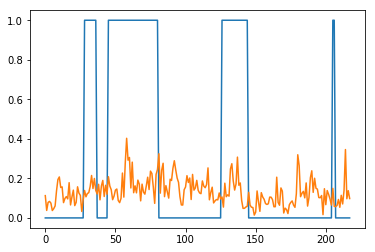

In [16]:
plot_laugh_detection(true_labels, predict_proba)

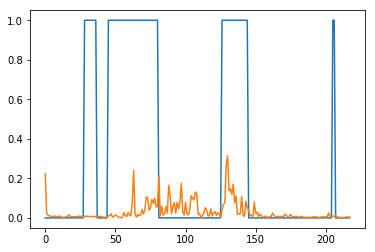

In [17]:
plot_laugh_detection(noise_true_labels, noise_predict_proba)

In [18]:
def plot_roc_auc(true_labels, predict_proba):
    fpr, tpr, _ = roc_curve(true_labels,  predict_proba)
    auc = roc_auc_score(true_labels, predict_proba)
    plt.plot(fpr, tpr, label="auc="+str(auc))
    plt.legend(loc=4)
    plt.show()

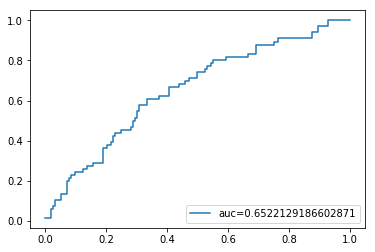

In [19]:
plot_roc_auc(true_labels, predict_proba)

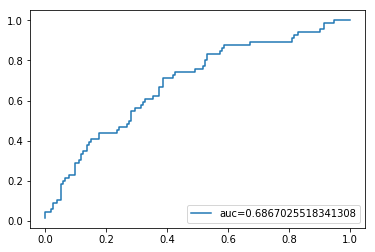

In [20]:
plot_roc_auc(noise_true_labels, noise_predict_proba)